In [1]:
# QUESTION 7: Use the Fast Greedy community detection algorithm to find the communities in
# the movie network. Pick 10 communities and for each community plot the distribution of the genres
# of the movies in the community.

In [62]:
library(igraph)
library(ggplot2)
library(hash)
library(plyr)

options(scipen = 999)

In [2]:
g <- read.graph("project4_data/q6_movies_weighted.txt", format="ncol", directed=FALSE)
# fg = cluster_fast_greedy(g)


In [3]:
# save(fg, file='q7_cluster_fast_greedy.rda')


In [4]:
# load object file since cluster_fast_greedy took forever to run..
load(file='q7_cluster_fast_greedy.rda')



In [63]:
movie_hash = hash()
index_file = file('project4_data/index_movies_list.txt', 'r')
index = 0
while(TRUE){
    line = readLines(index_file, n=1)
    if(length(line) == 0){break}
    arr = strsplit(line,"[\t\t]")
    
    .set(movie_hash, index, substr(line, start = 11, stop = nchar(line)))
    index = index + 1
}



[1] 100000
[1] "Ma quando arrivano le ragazze? (2005)"


In [64]:
genre_hash = hash()
genre_file = file('project4_data/movie_genre_fixed.txt','r')
while(TRUE){
    line = readLines(genre_file,  n=1)
    if(length(line) == 0){break}
    arr = strsplit(line, "[\t\t]")
    
    .set(genre_hash, arr[[1]][1], arr[[1]][3])
}

Warning message:
“closing unused connection 11 (project4_data/index_movies_list.txt)”Warning message:
“closing unused connection 7 (project4_data/movie_genre_fixed.txt)”

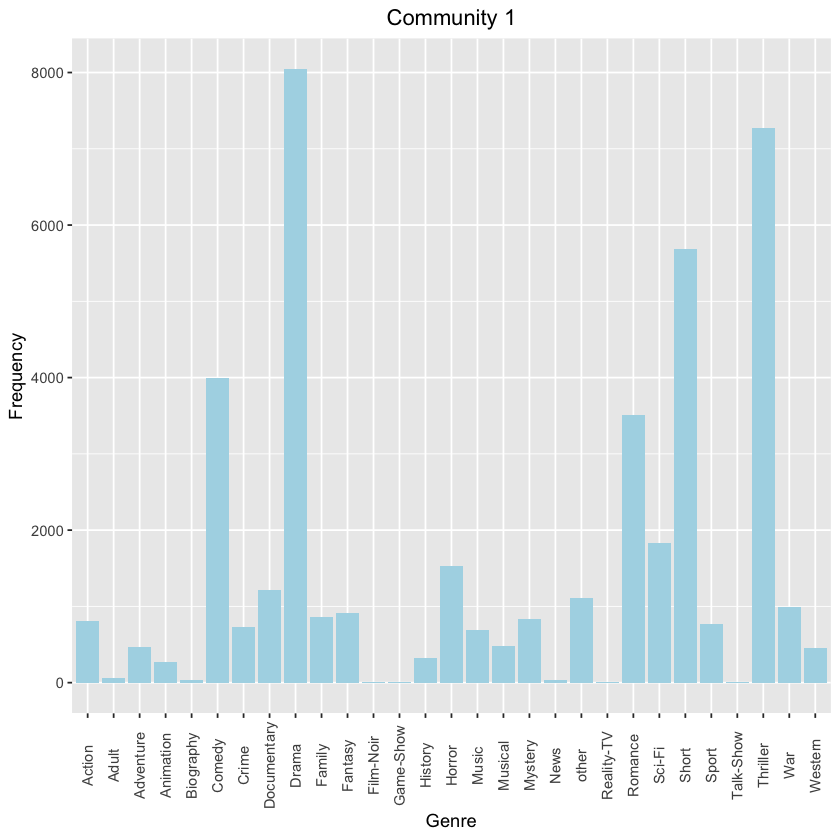

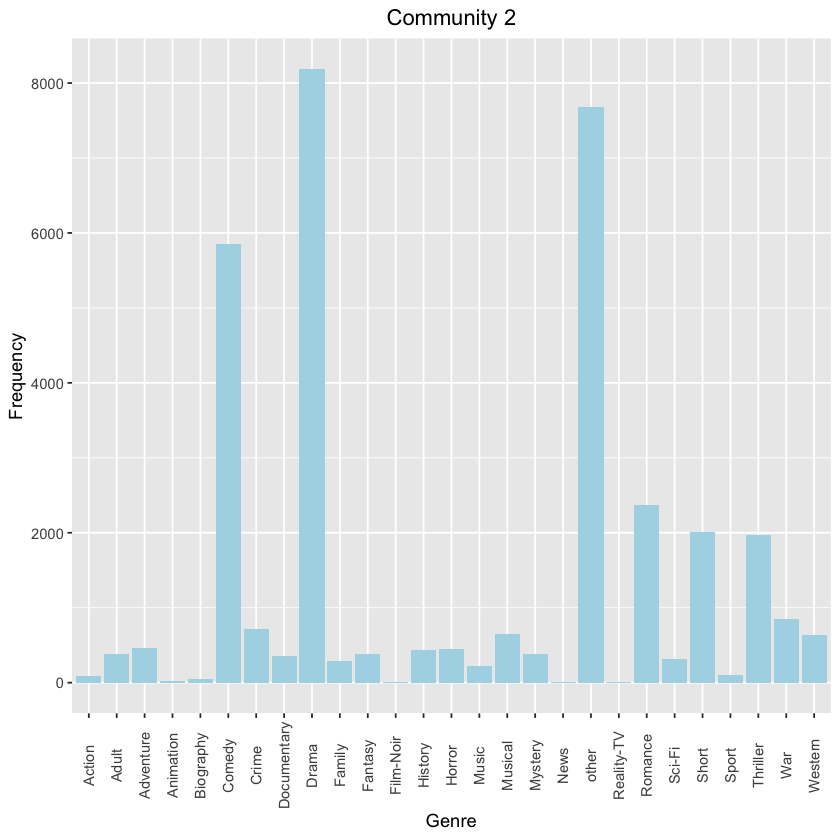

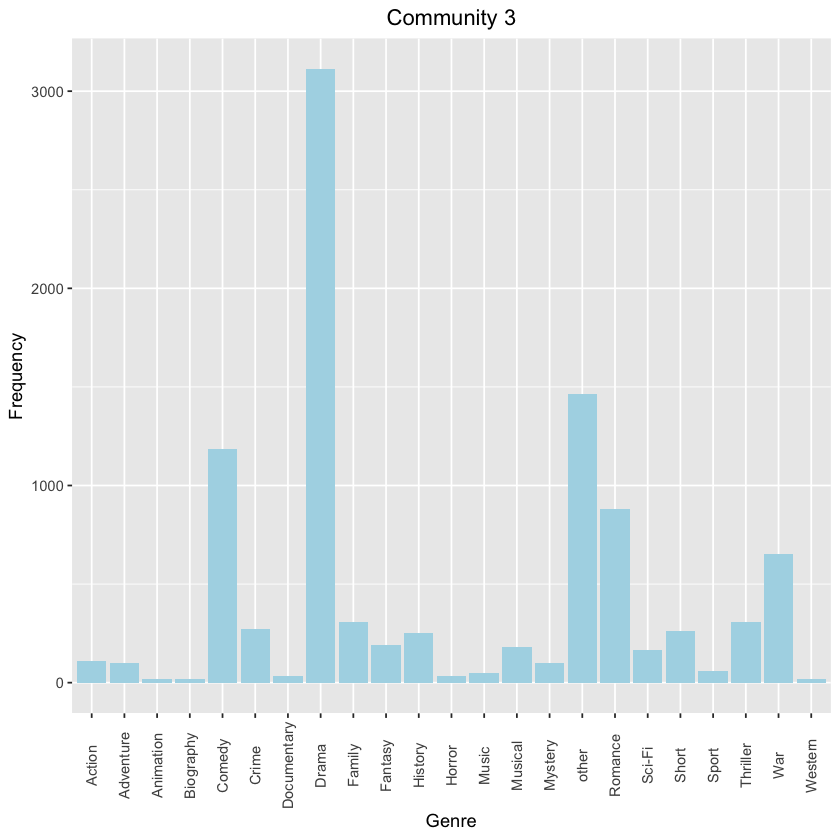

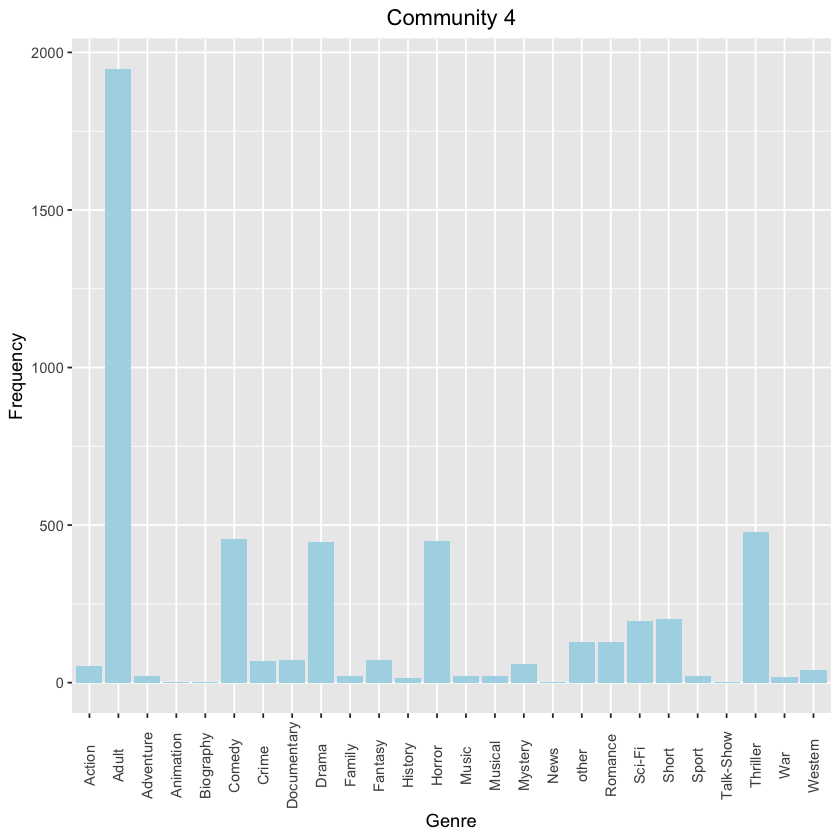

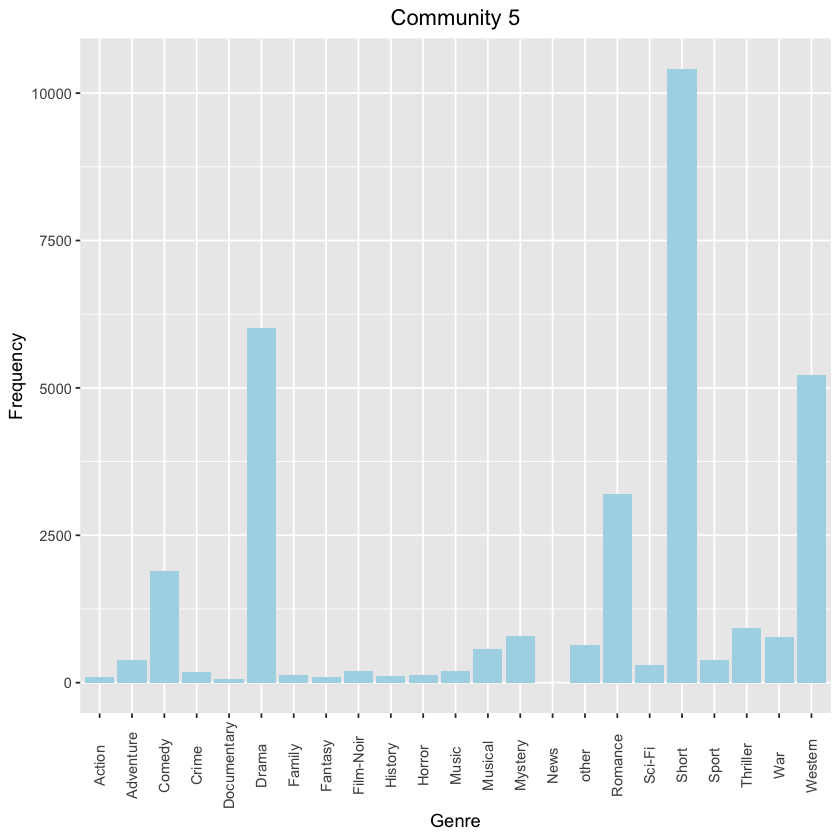

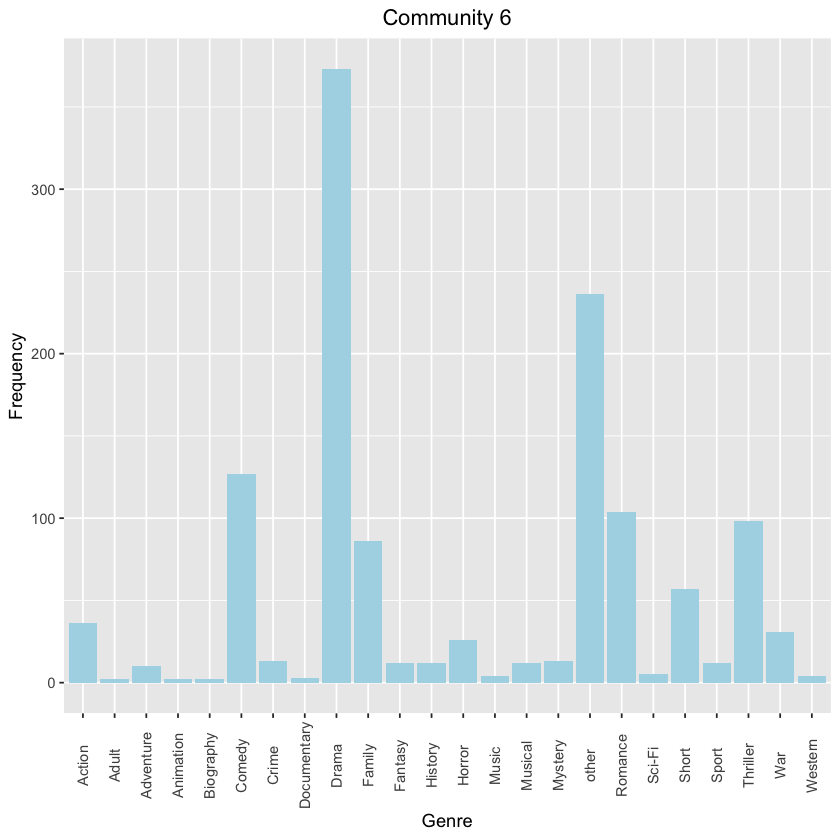

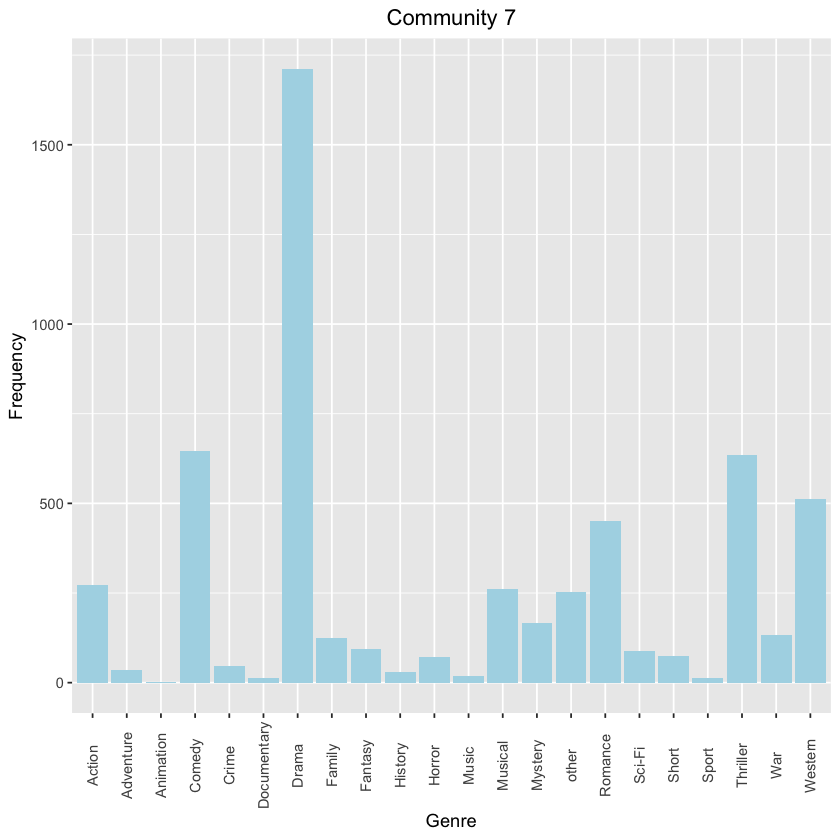

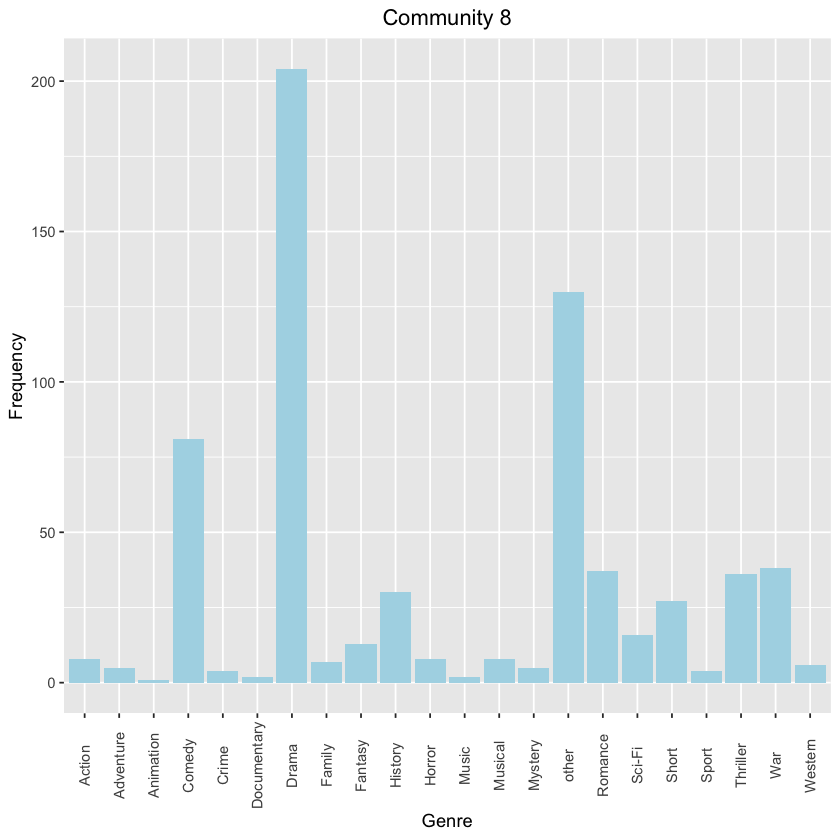

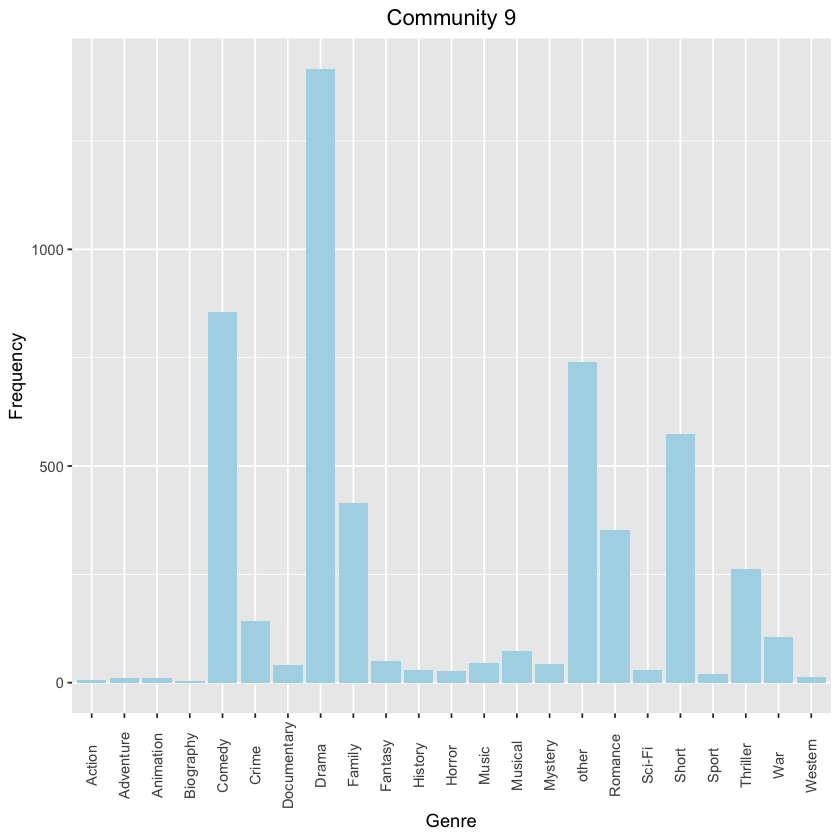

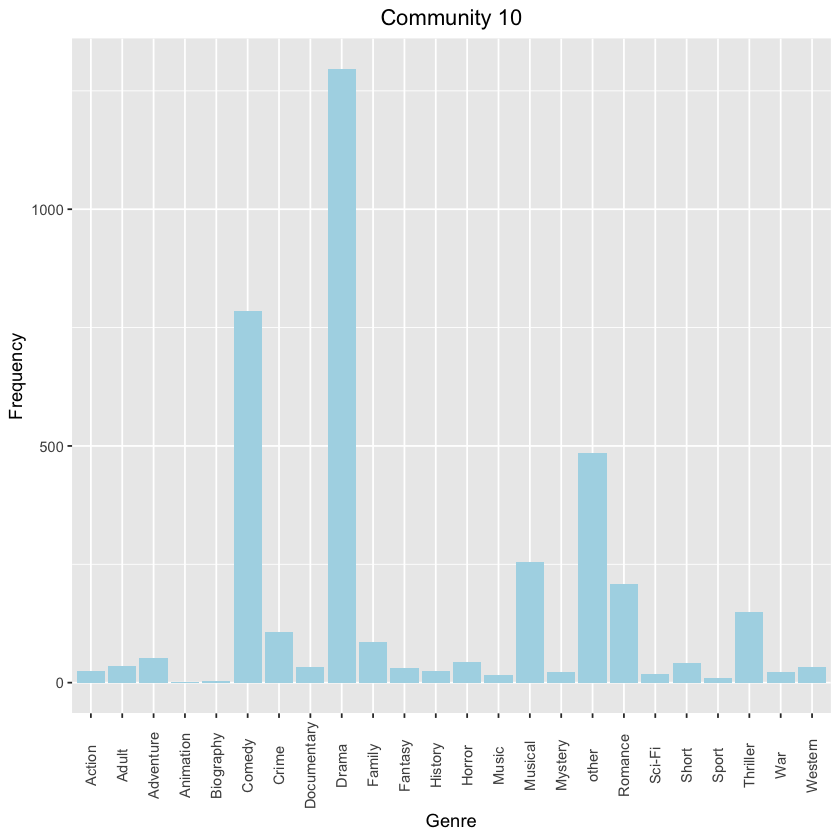

In [66]:
# loop through first 10 communities

for (i in c(1:10)){#10
#     print(paste('=========================================='))
    current_coummunity_ids = fg[[i]]
    genre_count = hash()
    movie = ''
    genre = ''
    
    for (j in current_coummunity_ids){
        movie = movie_hash[[j]]
        genre = genre_hash[[movie]]

        if(is.null(genre)){
            if(is.null(genre_count[['other']])){
                .set(genre_count, 'other', 0)
            }
            .set(genre_count, 'other', genre_count[['other']] + 1)
        }
        else{
            if(is.null(genre_count[[genre]])){
                .set(genre_count, genre, 0)
            }
            .set(genre_count, genre, genre_count[[genre]] + 1)
        }
    }
    
    keys = c()
    values = c()
    
    for(e in ls(genre_count)){
        keys = c(keys, e)
        values = c(values, genre_count[[e]])
    }
    
    df = data.frame(genre=keys, freq=values)
    hist_plot = ggplot(df, aes(x=genre, y=freq))+
    geom_bar(stat = "identity", fill="lightblue")+
    labs(title=paste('Community', i), x="Genre",y="Frequency")+
    theme(plot.title = element_text(hjust = 0.5),axis.text.x = element_text(angle = 90, hjust = 0.5, vjust = 0.5))
    print(hist_plot) 
    
    
}